# Week 8: A construction of the Poisson process


In this notebook we study a discrete-time process that behaves like the Poisson process at larger scales. One can also see this notebook as a <b> construction </b> of the Poisson process.

Fix $T$ and $\mu$ positive parameters and a very large integer $n$. We will see how we can naturally construct a Poisson process from a long random string of 0's and 1's.
We take a long string of size $T\times n$ of i.i.d. integers $(B_k)_k$ in $\{0,1\}$, with $\mathbb{P}(B_k = 1) = 1-\mathbb{P}(B_k = 0) = \frac{\mu}{n}$. We then record the instants at which the $1$'s appear (note that this has small proba) and check that the counting process of the $1$'s when time-rescaled by $N$ looks like a Poisson process up to time $T$.

The string should look a bit like this:
\begin{equation}
0000000000000000000000000 \color{blue}{1} 00000000000000000000000000\color{blue}{1}00000000000000000000
\end{equation}

Denoting $S$ the time of appearance of the first $1$, we can see that
\begin{align}
    \mathbb{P}(S/n > t) &= \mathbb{P}(S > nt) \\
    &= \mathbb{P}(B_k = 0 \text{ for all }k\leq nt) \\
    &= (1-\frac{\mu}{n})^{nt} \\
    &\to e^{-\mu t} \text{ as } n \text{ goes to infinity}.
\end{align}

This suggests that when rescaling the time by $n$, the time of appearance of $1$ should have law Exp$(\mu)$. And by independance of the bits in the string we see that any two consecutive $1$'s will be separated by an exponential random variable with parameter $\mu$. <b>Thus the time-rescaled counting process of the ones should converge to a Poisson process.</b>

This is what we shall see in the first part of this notebook.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#length of the string
n = 10**5 #it should go to infinity ideally but 10**5 is enough
T = 50 
mu = 1/5 #mu will ultimately be the rate of the Poisson process hidden in our construction 


# n should be seen as a quantity that will go to infinity and T as a fixed time horizon.
# The string has total length n*T so that, once rescaled by n, the counting process will have length ~ T.
S = np.random.choice(2, n*T, p=[1-mu/n,mu/n])# random integers from 0 (inclusive) to 2 (exclusive), size n.

# There are on average n*T*mu/n = T*mu bits equal to 1. 
# Let's check that.
print("T*mu = ", T*mu)
print("Number of bits equal to 1 in the string S: ", np.sum(S))

T*mu =  10.0
Number of bits equal to 1 in the string S:  15


In [14]:
time_jumps = np.argwhere(S==1) # time_jumps is the vector containing the indices of S where there are ones. 
#it corresponds to the jumps of the rescaled process

time_jumps = np.concatenate( time_jumps, axis=0 ) # we use this trick to have an array of reals instead of an array of array...

scaled_time_jumps = time_jumps/n # we rescaled the time by n

n_jumps = len(time_jumps)
jumps = [i for i in range(n_jumps)]

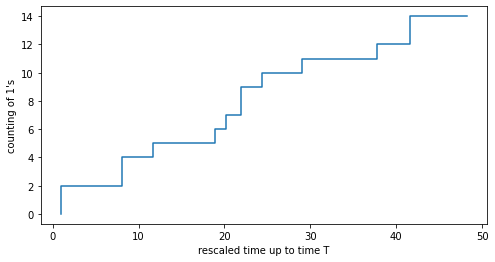

In [15]:
# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("rescaled time up to time T")
ax.set_ylabel("counting of 1's")

# Plot the theoretical pdf
plt.step(scaled_time_jumps, jumps, label='counting process rescaled by n')
#ax.legend(loc='best', frameon=False)
plt.show()

We will refer to the <b> time-rescaled </b>graph depicted above as the counting process $(C_t)_{0\leq t \leq T}$.
At that point, we see that the counting process looks very much like a Poisson process so let us check that we indeed retrieve some properties of a Poisson process of rate $\mu$ on it.


### 1) The law of $C_T$
For example, we first compute the empirical law of the counting process at time $T$ and compare it to the law of a Poisson process at time $T$. Recall that if $N$ is a poisson process of rate $\mu$ then
\begin{equation}
    \mathbb{P}(N(T) = k) = e^{-\mu T}\frac{(\mu T )^k}{k!}.
\end{equation}
To plot the empirical distribution of $C_T$ we will simulate many times the above construction and plot the results in an histogram that we will compare to the theoretical distribution.

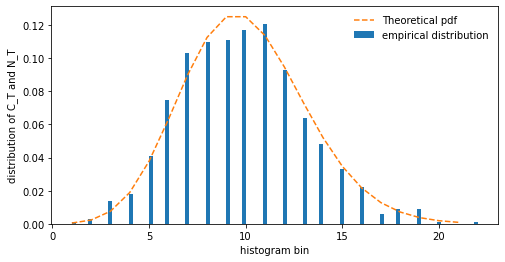

In [16]:
import scipy.stats as st
import math

# input data
N_sim = 10**3 # number of simulations
n = 10**4 
T = 50 
mu = 1/5 

C_T_array = np.zeros(N_sim)

for i in range(N_sim):
    S = np.random.choice(2, n*T, p=[1-mu/n,mu/n]) #create a new random string every time
    C_T_array[i] = np.sum(S)
    #C_T corresponds simply to the total number of ones in the string 
    #since this latter quantity is the number of jumps 
    #in the process C_t and thus its value at the final time t=T.

# Plot the empirical histogram and the theoretical pdf for T to compare
fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("histogram bin")
ax.set_ylabel("distribution of C_T and N_T")

# Compute and plot the histogram
weights = np.ones_like(C_T_array) / len(C_T_array) #this vector is used to normalize this histogram 
# so that the bars sum up to 1
ti, bins, pr = ax.hist(C_T_array, 100, weights = weights, label = 'empirical distribution')

# Specify the theoretical pdf in a good range of values
a,b = math.ceil(bins[0]),math.ceil(bins[-1])
f_T = np.zeros(b-a)
for k in range(a,b):
    f_T[k-a] = np.exp(-mu*T)*(mu*T)**k/math.factorial(k) #f is the (discrete) law of N_T
    
# Plot the theoretical pdf
ax.plot(range(a,b),f_T,'--', label='Theoretical pdf')
ax.legend(loc='best', frameon=False)
plt.show()

So the graphs look alike even though there is some apparent variability in the results. Since $N$ and $n$ should both be very large to have interesting results you can check that decreasing one of these parameters leads to less accuracy in the prediction.

### 2) The distribution of the instant of the first jump in $(C_t)_{0\leq t \leq T}$
Another thing that we can look at is the time of the first jump, we should recover that it is approximately given by an exponential distribution with parameter $\mu$. The larger $n$ and $N$ are, the better the approximation.

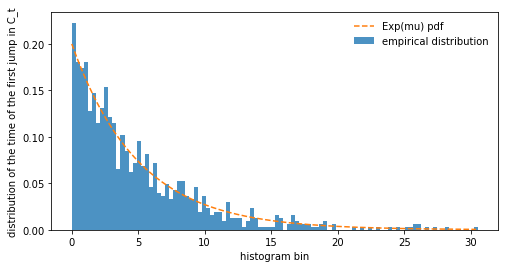

In [17]:
import scipy.stats as st
import math

# input data
N_sim = 10**3 # number of simulations
n = 10**4 
T = 70 
mu = 1/5 

C_T_array = np.zeros(N_sim)

for i in range(N_sim):
    S = np.random.choice(2, n*T, p=[1-mu/n,mu/n]) #create a new random string every time
    time_jumps = np.argwhere(S==1)
    C_T_array[i] = time_jumps[0]/n #Take the normalized time of the first jump 
    
    #It is possible though with very small probability that S contains no 1. In this case, the cell
    #will return an exception since time_jumps[0] will try to access the first element of an empty array.
    #If this is the case, you can just rerun the cell which should be fine since this has very small probability.
    #Otherwise you could modify the code to take into account these events into the description of the empirical distribution
    #of the first jump.

    
# Plot the empirical histogram and the theoretical pdf for T to compare
fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("histogram bin")
ax.set_ylabel("distribution of the time of the first jump in C_t")

# Definite the theoretical pdf
def pdf(x):
    return mu*np.exp(-mu*x)
# Compute and plot the histogram

ti, bins, pr = ax.hist(C_T_array, 100, density = True, label = 'empirical distribution',alpha = 0.8)
   
# Plot the theoretical pdf
x_axis = np.arange(0, bins[-1], 0.2)
ax.plot(x_axis, [pdf(x) for x in x_axis], '--', label='Exp(mu) pdf')
ax.legend(loc='best', frameon=False)
plt.show()

### 3) The distribution of the instant of later jumps in $(C_t)_{0\leq t \leq T}$

By modifying slightly the code above, can you plot the empirical law of the instant of the $10$-th jump? What should it be theoretically and is it what you observe? 

Note that it is possible that you don't oberserve $10$ $1$'s in the string $S$ and therefore that the $10$-th jump does not exist. You may take $T$ large enough to have an overwhelming probability to see $10$ jumps or you can try to observe anterior jumps like the $4$ or $5$ jumps for example and then one does not need $T$ to be too large.

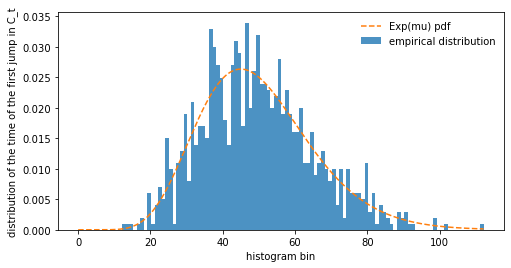

In [18]:
import scipy.stats as st
import math

# input data
N_sim = 10**3 # number of simulations
n = 10**4 
T = 200 
mu = 1/5 
n_jump = 10 #observe the 10-th jump

C_T_array = np.zeros(N_sim)

for i in range(N_sim):
    S = np.random.choice(2, n*T, p=[1-mu/n,mu/n]) #create a new random string every time
    time_jumps = np.argwhere(S==1)
    C_T_array[i] = time_jumps[n_jump-1]/n #Take the normalized time of the n_jump-th jump
    

    
# Plot the empirical histogram and the theoretical pdf 
fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("histogram bin")
ax.set_ylabel("distribution of the time of the first jump in C_t")

# Definite the theoretical pdf
# The k-th jumps has law Gamma(k,mu)
def pdf(x):
    return mu*np.exp(-mu*x)*((mu*x)**(n_jump-1))/math.factorial(n_jump-1)

# Compute and plot the histogram
ti, bins, pr = ax.hist(C_T_array, 100, density = True, label = 'empirical distribution',alpha = 0.8)
   
# Plot the theoretical pdf
x_axis = np.arange(0, bins[-1], 0.2)
ax.plot(x_axis, [pdf(x) for x in x_axis], '--', label='Exp(mu) pdf')
ax.legend(loc='best', frameon=False)
plt.show()

# Week 8 - Problem 6

## Exercise 1 - Empirical Distribution of the Poisson Process

Use the code from last week's notebook to compare the empirical distribution of a Poisson process $N(t)$ and intensity (rate) $\lambda$ (for example, use $t=100$, $\lambda=0.2$) with the theoretical distribution found in class.

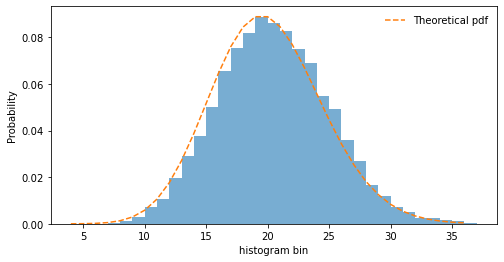

In [19]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import math

Lambda = 1/5 #ADD PARAMETER HERE
T= 100 # ADD PARAMETER HERE (maximum time of observation)


def sample_times(Lambda, N):
    return np.random.exponential(1/Lambda, N)

def num_copies_graded(tmax, Lambda):
    t_array = np.linspace(0, tmax, num=100)
    count=np.zeros(100)
    event=0
    while event < t_array[-1]:
        Ti = sample_times(Lambda, 1) #We use the exponential sampling defined in previous block
        event += Ti
        count[t_array >= event] +=1
    return count


# Sample N(t) a number of times
m = 10000
Nt_array = np.zeros(m)
for i in range(m):
    N=num_copies_graded(T, Lambda)
    Nt_array[i] = N[-1]

# Plot the empirical histogram
fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("histogram bin")
ax.set_ylabel("Probability")

binwidth = 1
bins = np.arange(min(Nt_array), max(Nt_array) + binwidth, binwidth)
nt, bins, pr = ax.hist(Nt_array, bins=bins, density=True, alpha=0.6)

# Specify the theoretical pdf in a good range of values
a,b = math.ceil(bins[0]),math.ceil(bins[-1])
f_T = np.zeros(b-a)
for k in range(a,b):
    f_T[k-a] = np.exp(-Lambda*T)*((Lambda*T)**k)/math.factorial(k)  #f is the (discrete) law of N_T

# Plot the theoretical pdf
ax.plot(range(a,b), f_T, '--', label='Theoretical pdf')
ax.legend(loc='best', frameon=False)
plt.show()

## Exercise 2 - Non-homogeneous Poisson Process

In this problem we will simulate non-homogeneous Poisson processes using this week's Jupyter notebook. Recall that for a non-negative function $\lambda: \mathbb{R}^+ \to \mathbb{R}^+$, the non-homogeneous Poisson process with intensity function $\lambda$ is the unique counting process satisfying 

- $\{N(t): t \geq 0\}$ has independent increments
- $\mathbb{P}(N(t+dt) - N(t) \geq 2) = o(dt)$
- $\mathbb{P}(N(t+dt) - N(t) = 1) = \lambda(t)dt + o(dt)$

See Ross, section 5.4, for more details. Use the Jupyter notebook to simulate the non-homogeneous Poisson process with the following functions:

**(a)** $\lambda(t) = ct$ for a constant $c > 0$. Generate a histogram to find the distribution of $N(t)$ for a fixed $t$ -- what do you expect the distribution to be?

We can derive the distribution for $N(t)$ in a few different ways. One way is to consider the Bernoulli r.v. variable construction of the Poisson process as we did in class (see the Remark after the proof of Theorem 5.2 in Ross). Alternatively, the derivation can be done as in the proof of Theorem 5.2 in Ross (11th edition). We find that $N(t)$ is equal in distribution to a Poisson random variable with mean $m(t)$ where
$$m(t) = \int_0^t \lambda(s) ds. $$

Hence, given $\lambda(t) = ct$, the pdf of $N(t)$ is given by
$$P(N(t) = k) = e^{-\frac12 ct^2}\frac{(\frac12 ct^2)^k}{k!}.$$

We have input this pdf in the block below to verify it matches the histogram generated.

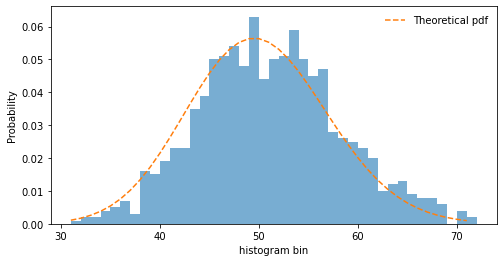

In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import math

# input data
T = 100
c = 0.01
N_sim = 10**3 # number of simulations

Nt_array = np.zeros(N_sim)

for i in range(N_sim):
    # Simulate arrival times
    arrival_times = [0]
    while arrival_times[-1] < 0.5*c*T**2:
        Ti = np.random.exponential(1)
        new_arrival_time = arrival_times[-1] + Ti # Arrival time for Poisson(1) process
        arrival_times.append(new_arrival_time)

    # Rescale arrival times according to the intensity
    rescaled_arrival_times = [np.sqrt((2/c)*t) for t in arrival_times]
    
    # Sample N(t) by counting the arrivals
    count = 0
    for t in rescaled_arrival_times:
        if t < T:
            count += 1
            
    Nt_array[i] = count
    
    
# Plot the empirical histogram
fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("histogram bin")
ax.set_ylabel("Probability")

binwidth = 1
bins = np.arange(min(Nt_array), max(Nt_array) + binwidth, binwidth)
nt, bins, pr = ax.hist(Nt_array, bins=bins, density=True, alpha=0.6)


# Specify the theoretical pdf in a good range of values
a,b = math.ceil(bins[0]),math.ceil(bins[-1])
f_T = np.zeros(b-a)
for k in range(a,b):
    f_T[k-a] = np.exp(-0.5*c*T**2)*((0.5*c*T**2)**k)/math.factorial(k)  #f is the (discrete) law of N_T

# Plot the theoretical pdf
ax.plot(range(a,b), f_T, '--', label='Theoretical pdf')
ax.legend(loc='best', frameon=False)
plt.show()

**(b)** $\lambda(t) = e^{-ct}$ for a constant $c > 0$. Argue that $N(t)$ is bounded as $t \to \infty$. Generate a histogram for $\lim_{t\to \infty} N(t)$ by sampling at a large time $t$ -- what do you expect the distribution to be?


Deriving the distribution for $N(t)$ as in (a), this time given $\lambda(t) = e^{-ct}$, the pdf of $N(t)$ is given by
$$P(N(t) = k) = e^{-\frac1c (1 - e^{-ct})}\frac{(\frac1c (1 - e^{-ct}))^k}{k!}.$$

We have input this pdf in the block below to verify it matches the histogram generated.

As $t \to \infty$ we expect $N(t)$ to be bounded since the intensity $\lambda(t)$ decays exponentially to zero and hence, after a long time has passed, the probability of an arrival occuring during any increment $dt$ of time is negligible. By Markov's inequality we have the following tail bound
$$\lim_{t \to \infty} P(N(t)\geq k) \leq \lim_{t \to \infty} \frac{m(t)}{k} = \frac{1}{ck}. $$

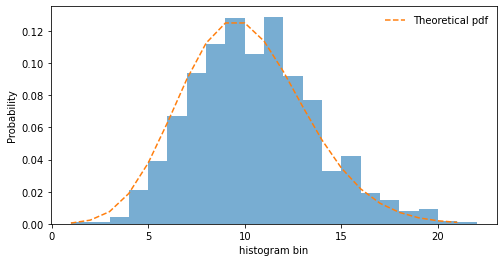

In [8]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import math

# input data
T = 10**3
c = 0.1
N_sim = 10**3 # number of simulations
lambda_t = lambda t : np.exp(-c*t)

Nt_array = np.zeros(N_sim)


# In part (b) we simulate N(t) using a thinning procedure
def thinning_probability(t, lambda_t_max): 
    return lambda_t(t)/lambda_t_max
    

def simulate_Nt(T):
    t=0
    count=0
    lambda_t_max = 1 # since the lambda_t is a decreasing function the max occurs at t=0
    
    while t<= T:
        r = np.random.uniform(0,1)
        t = t - math.log(r)/lambda_t_max
        s = np.random.uniform(0,1)
        
        if s <= thinning_probability(t, lambda_t_max):
            count += 1
            
    return count
    
    
# Simulate N(t) a number of times to generate the date for the histrogram
for i in range(N_sim):      
    Nt_array[i] = simulate_Nt(T)
    
    
# Plot the empirical histogram
fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("histogram bin")
ax.set_ylabel("Probability")

binwidth = 1
bins = np.arange(min(Nt_array), max(Nt_array) + binwidth, binwidth)
nt, bins, pr = ax.hist(Nt_array, bins=bins, density=True, alpha=0.6)


# Specify the theoretical pdf in a good range of values
a,b = math.ceil(bins[0]),math.ceil(bins[-1])
f_T = np.zeros(b-a)
for k in range(a,b):
    f_T[k-a] = np.exp(-(1/c)*(1-np.exp(-c*T)))*(((1/c)*(1-np.exp(-c*T)))**k)/math.factorial(k)  #f is the (discrete) law of N_T

# Plot the theoretical pdf
ax.plot(range(a,b), f_T, '--', label='Theoretical pdf')
ax.legend(loc='best', frameon=False)
plt.show()


**(c)** $\lambda(t) = c \cdot 1\{\lfloor t \rfloor \text{ is even}\}$ for a constant $c > 0$. Generate a histogram for $N(t)$: is it Poisson? How is this process related to the usual Poisson process with rate $c$?

Deriving the distribution for $N(t)$ as in (a) and (b), this time given $\lambda(t) = c \cdot 1\{\lfloor t \rfloor \text{ is even}\}$, the pdf of $N(t)$ is given by:

If $\lfloor t \rfloor$ is even we have,

$$P(N(t) = k) = e^{-c\frac{\lfloor t \rfloor - 1}{2}}\frac{\left(c\frac{\lfloor t \rfloor - 1}{2}\right)^k}{k!},$$

and if $\lfloor t \rfloor$ is odd

$$P(N(t) = k) = e^{-c\left(t - \frac{\lfloor t \rfloor}{2}\right)}\frac{\left(c\left(t - \frac{\lfloor t \rfloor}{2}\right)\right)^k}{k!},$$


We have input this pdf in the block below to verify it matches the histogram generated.

If $M(t)$ is a Poisson process with rate $c$, then in distribution, 

$ N(t) = M\left(\frac{\lfloor t \rfloor - 1}{2}\right)$, if $\lfloor t \rfloor$ is even, and

$N(t) = M\left(t - \frac{\lfloor t \rfloor}{2}\right)$, if $\lfloor t \rfloor$ is odd.

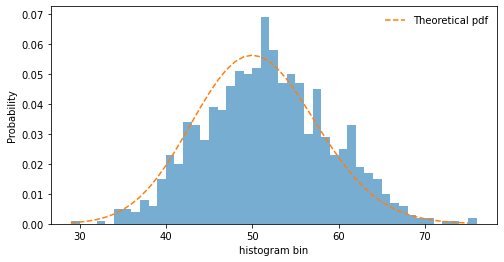

In [11]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import math

# input data
T = 10**2
c = 1
N_sim = 10**3 # number of simulations
lambda_t = lambda t : c*(1 - (math.floor(t) % 2))

Nt_array = np.zeros(N_sim)


# In part (b) we simulate N(t) using a thinning procedure
def thinning_probability(t, lambda_t_max): 
    return lambda_t(t)/lambda_t_max
    

def simulate_Nt(T):
    t=0
    count=0
    lambda_t_max = c # since lambda_t takes value 0 or value c > 0 for all t
    
    while t<= T:
        r = np.random.uniform(0,1)
        t = t - math.log(r)/lambda_t_max
        s = np.random.uniform(0,1)
        
        if s <= thinning_probability(t, lambda_t_max):
            count += 1
            
    return count
    
    
# Simulate N(t) a number of times to generate the data for the histogram
for i in range(N_sim):      
    Nt_array[i] = simulate_Nt(T)
    
    
# Plot the empirical histogram
fig, ax = plt.subplots(1, 1, figsize=(8, 4))    
ax.set_xlabel("histogram bin")
ax.set_ylabel("Probability")

binwidth = 1
bins = np.arange(min(Nt_array), max(Nt_array) + binwidth, binwidth)
nt, bins, pr = ax.hist(Nt_array, bins=bins, density=True, alpha=0.6)


# Specify the theoretical pdf in a good range of values
a,b = math.ceil(bins[0]),math.ceil(bins[-1])
f_T = np.zeros(b-a)

for k in range(a,b):
    if math.floor(T) % 2 == 0: # T is even
        f_T[k-a] = np.exp(-c*(math.floor(T)-1)/2)*((c*(math.floor(T)-1)/2)**k)/math.factorial(k)  #f is the (discrete) law of N_T
    else: # T is odd
        f_T[k-a] = np.exp(-c*(T - math.floor(T)/2))*((c*(T - math.floor(T)/2))**k)/math.factorial(k)  #f is the (discrete) law of N_T
        
        
# Plot the theoretical pdf
ax.plot(range(a,b), f_T, '--', label='Theoretical pdf')
ax.legend(loc='best', frameon=False)
plt.show()